In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [101]:
import pandas as pd
import numpy as np
import gzip
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from keras import initializers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
import torch

In [3]:
def accuracy(pred, test):
  length = len(pred)
  num = 0
  for i in range(length):
    if pred[i]==test[i]:
      num += 1
  return num/(length*1.0)

In [152]:
def classWiseAccuracy(y_t,y_p):
  pred = []
  test = []
  for i in range(10):
    pred.append([])
    test.append([])

  for i in range(len(y_p)):
    cls = y_t[i]
    pred[cls].append(y_t[i])
    test[cls].append(y_p[i])

  for i in range(10):
    print('Class'+str(i), end = ' ')
    print(accuracy_score(test[i],pred[i]))

In [4]:
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

#Question 1

In [146]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")
# y_test = list(y_test)

X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

(60000, 28, 28)
(10000, 28, 28)


In [147]:
iterations = 5
learning_rate = 0.1
trees = []

In [ ]:
# F0 = y_train.mean()
# Fm = F0
# trees = []
# for _ in range(5):
#     tree = DecisionTreeRegressor()
#     tree.fit(X_train, y_train - Fm)
#     Fm += learning_rate * tree.predict(X_train)
#     trees.append(tree)
# final_prediction = F0 + learning_rate * np.sum([t.predict(X_train) for t in trees], axis=0)
# print(final_prediction)
# for i in range(len(final_prediction)):
#   final_prediction[i] = round(final_prediction[i])
# print(accuracy(list(final_prediction), list(y_train)))

In [71]:
# base_model = DecisionTreeRegressor(max_depth = 1)
# base_model = base_model.fit(X_train, y_train)
# prediction = base_model.predict(X_train)
# trees.append(base_model)

In [148]:
prediction = 0

In [149]:
for i in range(iterations):
  residue = y_train-(learning_rate*prediction)
  print(residue)
  model = DecisionTreeRegressor(max_depth=1)
  model = model.fit(X_train, residue)
  prediction = model.predict(X_train)
  trees.append(model)

[5. 0. 4. ... 5. 6. 8.]
[ 4.46328627 -0.26254691  3.46328627 ...  4.46328627  5.46328627
  7.46328627]
[ 4.51695764 -0.23629222  3.51695764 ...  4.51695764  5.51695764
  7.51695764]
[ 4.5115905  -0.23891769  3.5115905  ...  4.5115905   5.5115905
  7.5115905 ]
[ 4.51212722 -0.23865514  3.51212722 ...  4.51212722  5.51212722
  7.51212722]


In [ ]:
# y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [150]:
final_prediction = learning_rate * np.sum([t.predict(X_train) for t in trees], axis=0)
for i in range(len(final_prediction)):
  final_prediction[i] = round(final_prediction[i])
print('Training accuracy:', accuracy(list(final_prediction), list(y_train)))

Training accuracy: 0.17033333333333334


In [151]:
test = learning_rate*np.sum([t.predict(X_test) for t in trees], axis=0)
# print(test)
for i in range(len(test)):
  test[i] = round(test[i])
print('Testing accuracy:', accuracy(list(test), list(y_test)))

Testing accuracy: 0.1706


#Question 2

In [104]:
df_train = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_test.csv")

In [105]:
X_train = df_train.loc[ : , df_train.columns != 'label']
y_train = pd.DataFrame(df_train['label'])

X_test = df_test.loc[ : , df_test.columns != 'label']
y_test = pd.DataFrame(df_test['label'])

In [106]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [107]:
model = Sequential()

model.add(Dense(512, input_dim=784, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(128, input_dim=512, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(64, input_dim=128, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(32, input_dim=128, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(10, input_dim=32, trainable=True,activation='softmax', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 512)               401920    
                                                                 
 dense_87 (Dense)            (None, 128)               65664     
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dense_90 (Dense)            (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, to_categorical(y_train), batch_size=700, epochs=28) #batch sie = 700

Epoch 1/28
86/86 [==============================] - 4s 36ms/step - loss: 2.2941 - accuracy: 0.2290
Epoch 2/28
86/86 [==============================] - 3s 36ms/step - loss: 2.1742 - accuracy: 0.3734
Epoch 3/28
86/86 [==============================] - 3s 36ms/step - loss: 1.9361 - accuracy: 0.4103
Epoch 4/28
86/86 [==============================] - 3s 36ms/step - loss: 1.6981 - accuracy: 0.5179
Epoch 5/28
86/86 [==============================] - 3s 36ms/step - loss: 1.5486 - accuracy: 0.5826
Epoch 6/28
86/86 [==============================] - 3s 35ms/step - loss: 1.4092 - accuracy: 0.6222
Epoch 7/28
86/86 [==============================] - 3s 35ms/step - loss: 1.2755 - accuracy: 0.6296
Epoch 8/28
86/86 [==============================] - 3s 35ms/step - loss: 1.1569 - accuracy: 0.6324
Epoch 9/28
86/86 [==============================] - 3s 36ms/step - loss: 1.0529 - accuracy: 0.6593
Epoch 10/28
86/86 [==============================] - 3s 36ms/step - loss: 0.9649 - accuracy: 0.6910
Epoch 11/

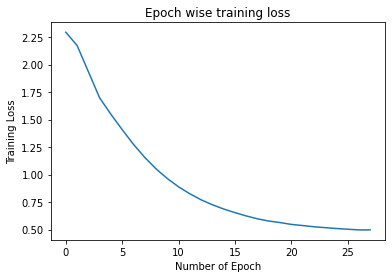

In [109]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [110]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = list(y_pred)
y_test = y_test.reshape(10000,)
y_test = list(y_test)

In [111]:
print('Accuracy: ', accuracy(y_pred, y_test))

Accuracy:  0.8203


In [112]:
classWiseAccuracy(y_test,y_pred)

Class0 0.809
Class1 0.939
Class2 0.734
Class3 0.848
Class4 0.63
Class5 0.878
Class6 0.582
Class7 0.871
Class8 0.946
Class9 0.966


#Question 3

In [113]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
# X_train = (X_train/255)-0.5
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
# X_test = (X_test/255)-0.5
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [114]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [115]:
model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu', trainable=True, use_bias=True)) #trainable=true #use_bias=true

model.add(Dense(128, input_dim=512, activation='relu', trainable=True, use_bias=True))

model.add(Dense(64, input_dim=128, activation='relu', trainable=True, use_bias=True))

model.add(Dense(128, input_dim=64, activation='relu', trainable=True, use_bias=True))

model.add(Dense(512, input_dim=128, activation='relu', trainable=True, use_bias=True))

model.add(Dense(784, input_dim=512, activation='relu', trainable=True, use_bias=True))

adam = tf.keras.optimizers.Adam(learning_rate=0.001) #learning_rate=0.001

model.compile(
  optimizer=adam,
  loss='mean_squared_error',
  metrics=['accuracy']
)

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 512)               401920    
                                                                 
 dense_92 (Dense)            (None, 128)               65664     
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dense_94 (Dense)            (None, 128)               8320      
                                                                 
 dense_95 (Dense)            (None, 512)               66048     
                                                                 
 dense_96 (Dense)            (None, 784)               402192    
                                                                 
Total params: 952,400
Trainable params: 952,400
Non-t

In [116]:
history = model.fit(X_train, X_train, batch_size=512, epochs=30)

Epoch 1/30
118/118 [==============================] - 8s 62ms/step - loss: 2421.3669 - accuracy: 0.0094
Epoch 2/30
118/118 [==============================] - 7s 62ms/step - loss: 1185.0566 - accuracy: 0.0114
Epoch 3/30
118/118 [==============================] - 7s 62ms/step - loss: 1004.8395 - accuracy: 0.0120
Epoch 4/30
118/118 [==============================] - 8s 65ms/step - loss: 915.5562 - accuracy: 0.0121
Epoch 5/30
118/118 [==============================] - 7s 62ms/step - loss: 861.1129 - accuracy: 0.0129
Epoch 6/30
118/118 [==============================] - 7s 61ms/step - loss: 821.9891 - accuracy: 0.0142
Epoch 7/30
118/118 [==============================] - 7s 61ms/step - loss: 790.2311 - accuracy: 0.0141
Epoch 8/30
118/118 [==============================] - 7s 61ms/step - loss: 766.1562 - accuracy: 0.0143
Epoch 9/30
118/118 [==============================] - 7s 62ms/step - loss: 746.1924 - accuracy: 0.0139
Epoch 10/30
118/118 [==============================] - 7s 62ms/step - 

In [117]:
model.save('Autoencoder.h5')

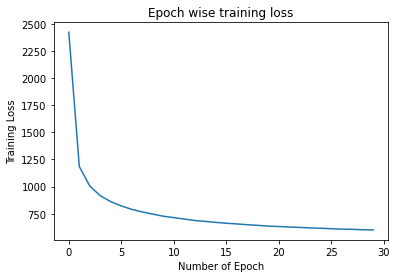

In [118]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [119]:
model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu', trainable=False, use_bias=True)) #trainable=true #use_bias=true

model.add(Dense(128, input_dim=512, activation='relu', trainable=False, use_bias=True))

model.add(Dense(64, input_dim=128, activation='relu', trainable=False, use_bias=True))

model.add(Dense(32, input_dim=64, activation='relu', trainable=True, use_bias=True))

model.add(Dense(10, input_dim=32, activation='softmax', trainable=True, use_bias=True))

adam = tf.keras.optimizers.Adam(learning_rate=0.001) #learning_rate=0.001

model.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 512)               401920    
                                                                 
 dense_98 (Dense)            (None, 128)               65664     
                                                                 
 dense_99 (Dense)            (None, 64)                8256      
                                                                 
 dense_100 (Dense)           (None, 32)                2080      
                                                                 
 dense_101 (Dense)           (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 2,410
Non-trainable params: 475,840
_________________________________________________________________


In [120]:
history = model.fit(X_train, to_categorical(y_train), batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 3s 5ms/step - loss: 9.4047 - accuracy: 0.3988
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 1.7047 - accuracy: 0.4699
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 1.3873 - accuracy: 0.5542
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 1.1509 - accuracy: 0.6270
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.9940 - accuracy: 0.6741
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.9013 - accuracy: 0.7032
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.8470 - accuracy: 0.7199
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 0.8088 - accuracy: 0.7332
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.7768 - accuracy: 0.7452
Epoch 10/30
600/600 [==============================] - 3s 5ms/step - loss: 0.7484 - accuracy: 0.7552

In [121]:
model.save('MNISTClassificationModel.h5')

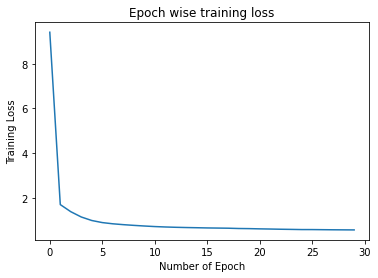

In [122]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [123]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = list(y_pred)
y_test = y_test.reshape(10000,)
y_test = list(y_test)

In [124]:
print('Accuracy:', accuracy(y_pred, y_test))

Accuracy: 0.8163


In [125]:
classWiseAccuracy(y_test, y_pred)

Class0 0.9193877551020408
Class1 0.9409691629955947
Class2 0.8081395348837209
Class3 0.7653465346534654
Class4 0.7505091649694501
Class5 0.7769058295964125
Class6 0.8496868475991649
Class7 0.8219844357976653
Class8 0.7782340862422998
Class9 0.7333994053518335


#Question 4

In [137]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [138]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [139]:
dataset1 = np.zeros((60000,28*28))
y1 = []

dataset2 = np.zeros((60000,28*28))
y2 = []

dataset3 = np.zeros((60000,28*28))
y3 = []

notVal1 = []
notVal2 = []
notVal3 = []

In [140]:
for i in range(60000):

  index1 = random.randint(0,59999)
  if index1 not in notVal1:
    notVal1.append(index1)

  index2 = random.randint(0,59999)
  if index2 not in notVal2:
    notVal2.append(index2)

  index3 = random.randint(0,59999)
  if index3 not in notVal3:
    notVal3.append(index3)

  dataset1[i] = X_train[index1]
  y1.append(y_train[index1])

  dataset2[i] = X_train[index2]
  y2.append(y_train[index2])

  dataset3[i] = X_train[index3]
  y3.append(y_train[index3])

val1 = np.zeros((60000-len(notVal1),28*28))
y_val1 = []

val2 = np.zeros((60000-len(notVal2),28*28))
y_val2 = []

val3 = np.zeros((60000-len(notVal3),28*28))
y_val3 = []

j1 = 0
j2 = 0
j3 = 0

for i in range(60000):

  if i not in notVal1 and j1<60000-len(notVal1):
    val1[j1] = X_train[i]
    y_val1.append(y_train[i])
    j1 += 1

  if i not in notVal2 and j2<60000-len(notVal2):
    val2[j2] = X_train[i]
    y_val2.append(y_train[i])
    j2 += 1

  if i not in notVal3 and j3<60000-len(notVal3):
    val3[j3] = X_train[i]
    y_val3.append(y_train[i])
    j3 += 1

In [141]:
print(val1.shape)
print(val2.shape)
print(val3.shape)
print(len(notVal1))
print(len(notVal2))
print(len(notVal3))

(22028, 784)
(22044, 784)
(21981, 784)
37972
37956
38019


3 Decision Trees have to be made.

In [142]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(dataset1,y1)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(dataset2,y2)

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(dataset3,y3)

In [143]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [144]:
num = 0
final_pred = []

for i in range(len(y_test)):

  a = y_pred1[i]
  b = y_pred2[i]
  c = y_pred3[i]

  ans = y_test[i]

  if a==b and b==c:
    if a==ans:
      final_pred.append(a)
      num += 1
  elif a==b and b!=c:
    if a==ans:
      final_pred.append(a)
      num += 1
  elif b==c and c!=a:
    if b==ans:
      final_pred.append(b)
      num += 1
  elif c==a and a!=b:
    if c==ans:
      final_pred.append(c)
      num += 1
  else:
    if a==ans:
      final_pred.append(a)
      num += 1

num = num*1.0

print('Accuracy:', num/len(y_test))

Accuracy: 0.9099


In [153]:
classWiseAccuracy(list(y_test), final_pred)

Class0 0.12401352874859076
Class1 0.12524271844660195
Class2 0.11016949152542373
Class3 0.10032715376226826
Class4 0.09899888765294772
Class5 0.08620689655172414
Class6 0.09666283084004602
Class7 0.12864864864864864
Class8 0.0992108229988726
Class9 0.09364908503767493
